In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn import decomposition
from sklearn import preprocessing

In [2]:
df = pd.read_csv("data/final_dataset.csv")
df.fillna("")
df.head()

Unnamed: 0      code                product_name        brands  \
0           0     36252              Lion Peanut x2      Sunridge   
1           1  10187319              Mini Confettis  Alice Délice   
2           2  10207260  Praliné Amande Et Noisette  Alice Délice   
3           3  40608754       Pepsi, Nouveau goût !         Pepsi   
4           4  69161025   Tarte Poireaux Et Lardons      Bo Frost   

  nutrition_grade_fr pnns_groups_1        pnns_groups_2          packaging  \
0                  e       unknown              unknown                NaN   
1                  d           NaN                  NaN                NaN   
2                  d           NaN                  NaN                NaN   
3                  e     Beverages  Sweetened beverages  Canette aluminium   
4                  d           NaN                  NaN                NaN   

                                    ingredients_text  \
0  Milk chocolate coating (evaporated cane juice,...   
1                                                NaN   
2                                                NaN   
3  Eau gazéifiée, sucre, colorant caramel E150d, ...   
4                                                NaN   

                                           additives  ...  energy_100g  \
0   [ milk-chocolate-coating -> en:milk-chocolate...  ...   450.047801   
1                                                NaN  ...   418.977055   
2                                                NaN  ...   575.047801   
3   [ eau-gazeifiee -> fr:eau-gazeifiee  ]  [ eau...  ...    42.304015   
4                                                NaN  ...   257.887189   

   fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0      20.0                12.5                70.0         57.5         2.5   
1       9.0                 0.8                30.0          4.6         0.9   
2       9.0                 2.9                30.0          4.6         3.9   
3       0.0                 0.0                10.4         10.4         0.0   
4       9.0                 2.0                30.0          1.0         1.4   

   proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  
0            2.5    0.09652     0.038000                     22.0  
1            0.6    0.01000     0.003937                     14.0  
2            9.5    0.00300     0.001181                     14.0  
3            0.0    0.02540     0.010000                     13.0  
4            7.5    0.80000     0.314961                     15.0  

[5 rows x 21 columns]

### Qualitative variables

In [3]:
df.columns
vars_qual = [var for var in df.columns if "100g" not in var][1:]
for x in ["code", "product_name", "brands", 'ingredients_text', 'additives', 'packaging']:
    vars_qual.remove(x)

In [4]:
print(vars_qual)

['nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'ingredients_from_palm_oil_n']


In [5]:
def univar_plot_qual(var):
  print(df[var].value_counts())
  plt.figure(figsize=(10, 10))
  sns.countplot(y=var, data=df)
  plt.title(var)

  plt.figure(figsize=(6,6))
  df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
  plt.ylabel('')
  plt.title(var)

  plt.show()

nutrition_grade_fr
d    16369
c    12732
e    11282
a     9871
b     8790
Name: count, dtype: int64


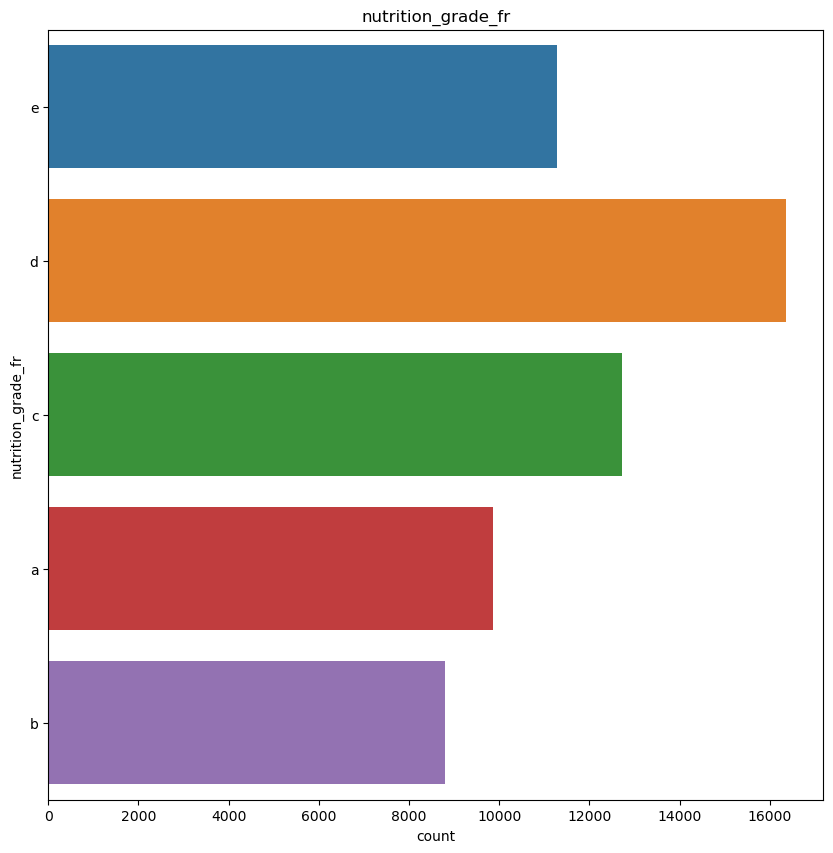

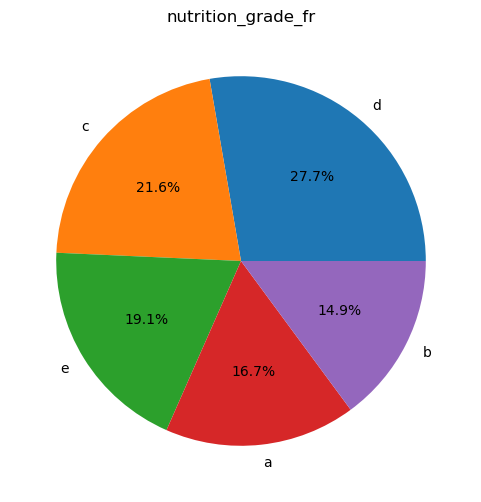

pnns_groups_1
Sugary snacks              7112
unknown                    6833
Milk and dairy products    5009
Cereals and potatoes       4951
Composite foods            4942
Fish Meat Eggs             4426
Beverages                  4137
Fat and sauces             2631
Fruits and vegetables      2602
Salty snacks               1733
fruits-and-vegetables       407
sugary-snacks               375
cereals-and-potatoes          1
Name: count, dtype: int64


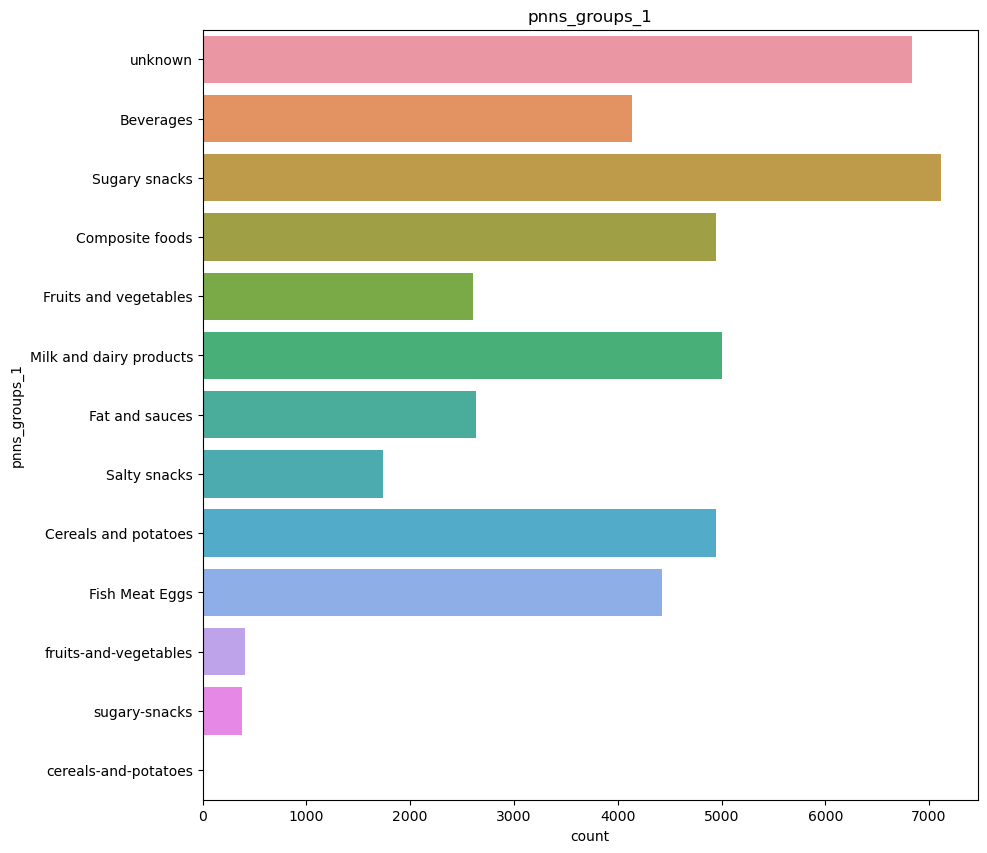

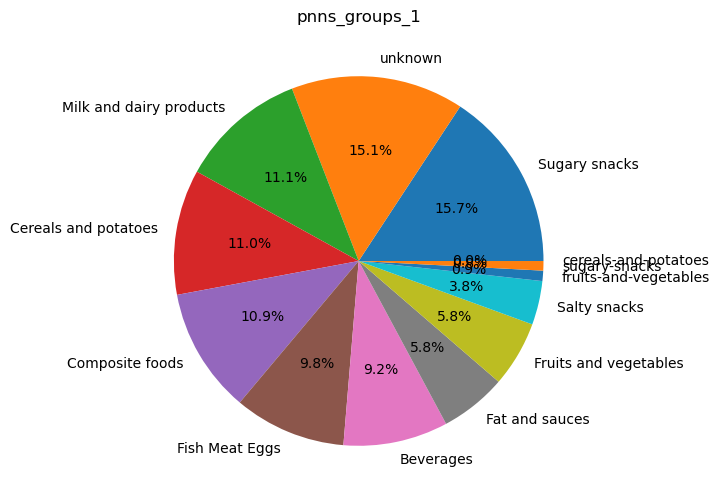

pnns_groups_2
unknown                             6833
One-dish meals                      3955
Biscuits and cakes                  3170
Cereals                             2439
Sweets                              2222
Cheese                              2162
Processed meat                      2052
Dressings and sauces                1778
Chocolate products                  1720
Milk and yogurt                     1700
Fish and seafood                    1507
Appetizers                          1372
Fruit juices                        1255
Sweetened beverages                 1247
Non-sugared beverages               1209
Bread                               1080
Vegetables                          1079
Breakfast cereals                    982
Fruits                               901
Fats                                 853
Meat                                 767
Dairy desserts                       647
Sandwich                             586
Ice cream                            500
Le

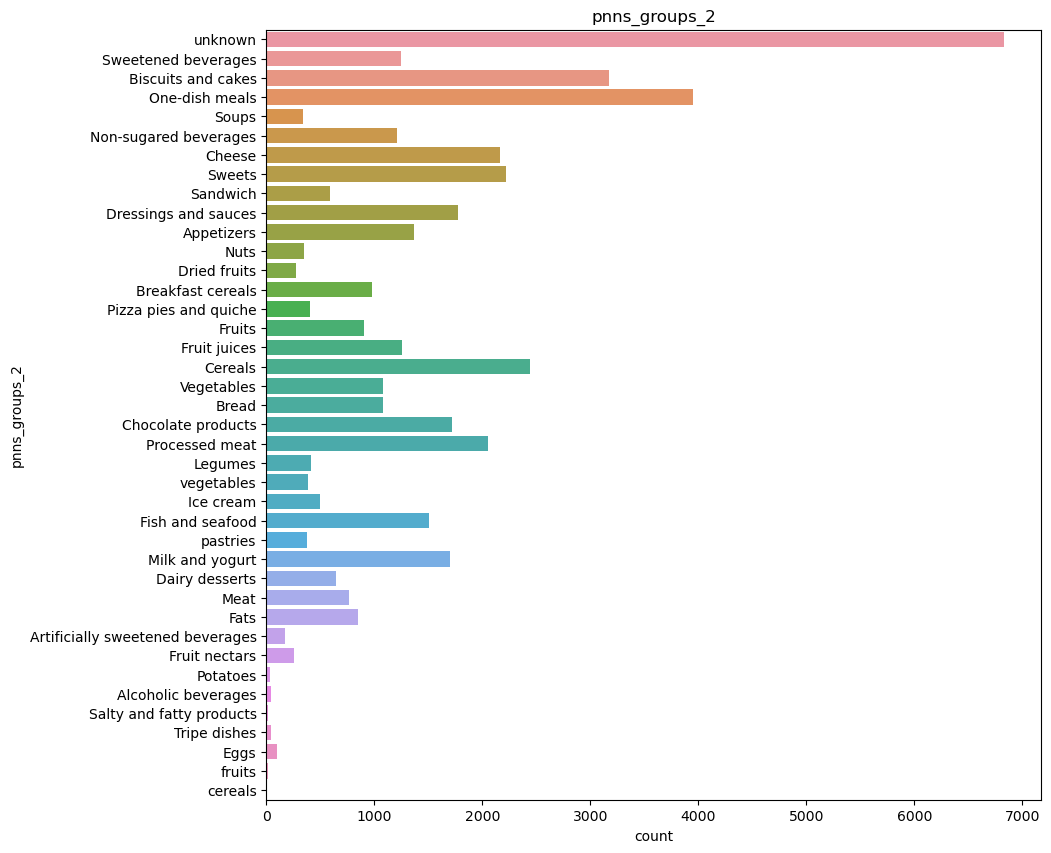

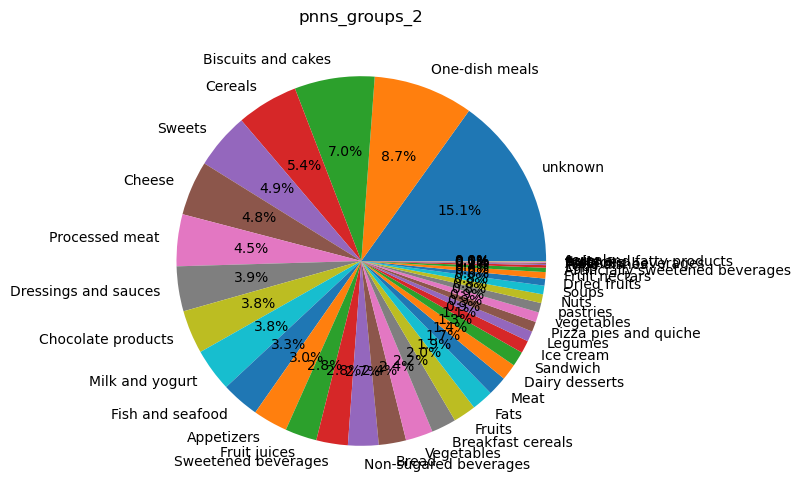

ingredients_from_palm_oil_n
0.0    58724
1.0      320
Name: count, dtype: int64


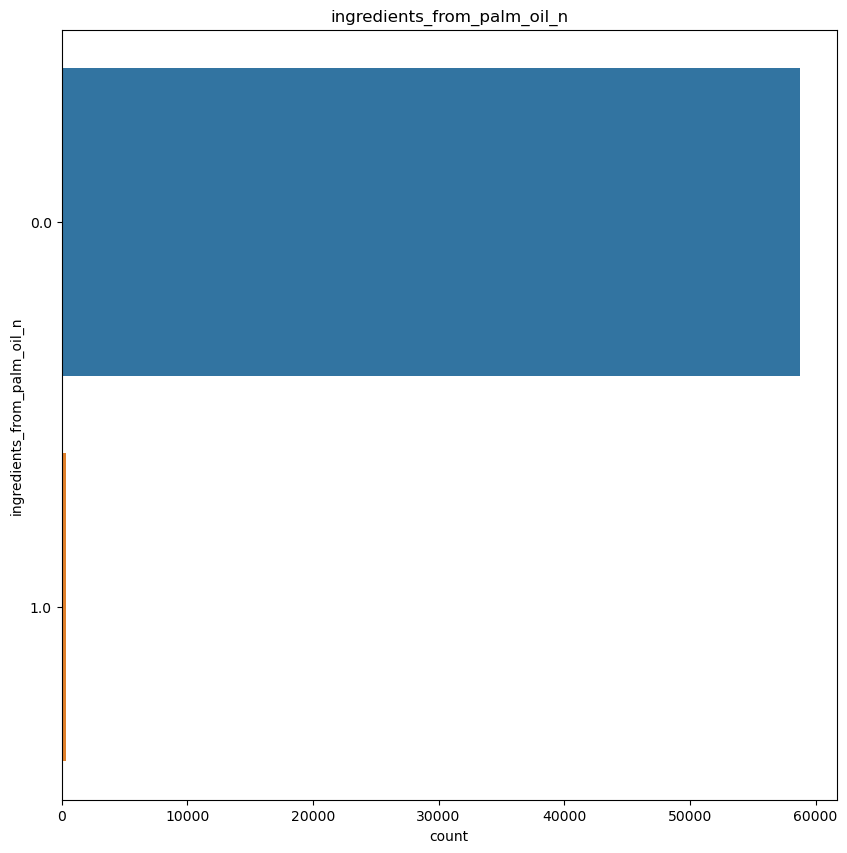

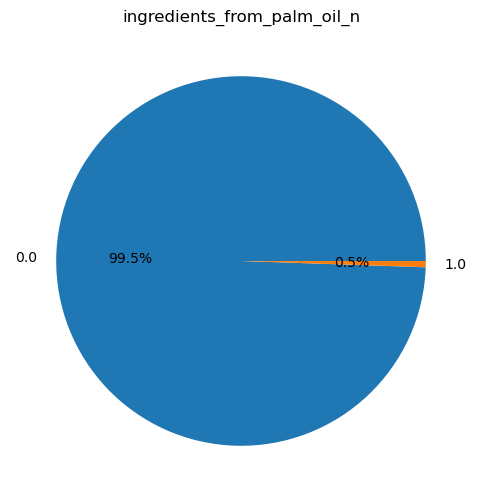

In [6]:
for var in vars_qual:
    univar_plot_qual(var)

### Quantitative variables

In [7]:
df.columns
vars_quant = [var for var in df.columns if "100g" in var]
vars_quant

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [8]:
df[vars_quant].describe()

energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  59044.000000  59044.000000        59044.000000        59044.000000   
mean     268.678790     12.520201            4.456121           27.713597   
std      186.693822     15.394929            7.193849           25.421154   
min        0.000000      0.000000            0.000000            0.000000   
25%      104.923518      1.900000            0.300000            5.100000   
50%      249.043977      8.400000            1.700000           20.550000   
75%      396.032505     18.000000            5.500000           51.000000   
max     1498.087954    100.000000          100.000000          100.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g   sodium_100g  \
count  59044.000000  59044.000000   59044.000000  59044.000000  59044.000000   
mean      10.931613      1.870262       7.775740      1.077603      0.426486   
std       16.550969      4.076640       7.857189      3.662882      1.495138   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        1.000000      0.000000       1.900000      0.080000      0.031496   
50%        3.700000      0.100000       6.000000      0.558800      0.220000   
75%       12.700000      2.400000      10.900000      1.230000      0.484252   
max      100.000000    100.000000     100.000000    100.000000     83.000000   

       nutrition-score-fr_100g  
count             59044.000000  
mean                  9.651463  
std                   8.220947  
min                  -7.500000  
25%                   2.000000  
50%                   9.000000  
75%                  15.000000  
max                  40.000000

In [9]:
def univar_plot_quant(var):

  print(var)

  print(df[var].describe())

  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

  sns.histplot(x=var, data=df, kde=True, ax=axes[0])

  sns.boxplot(x=var, data=df, ax=axes[1])

  plt.show()

energy_100g
count    59044.000000
mean       268.678790
std        186.693822
min          0.000000
25%        104.923518
50%        249.043977
75%        396.032505
max       1498.087954
Name: energy_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


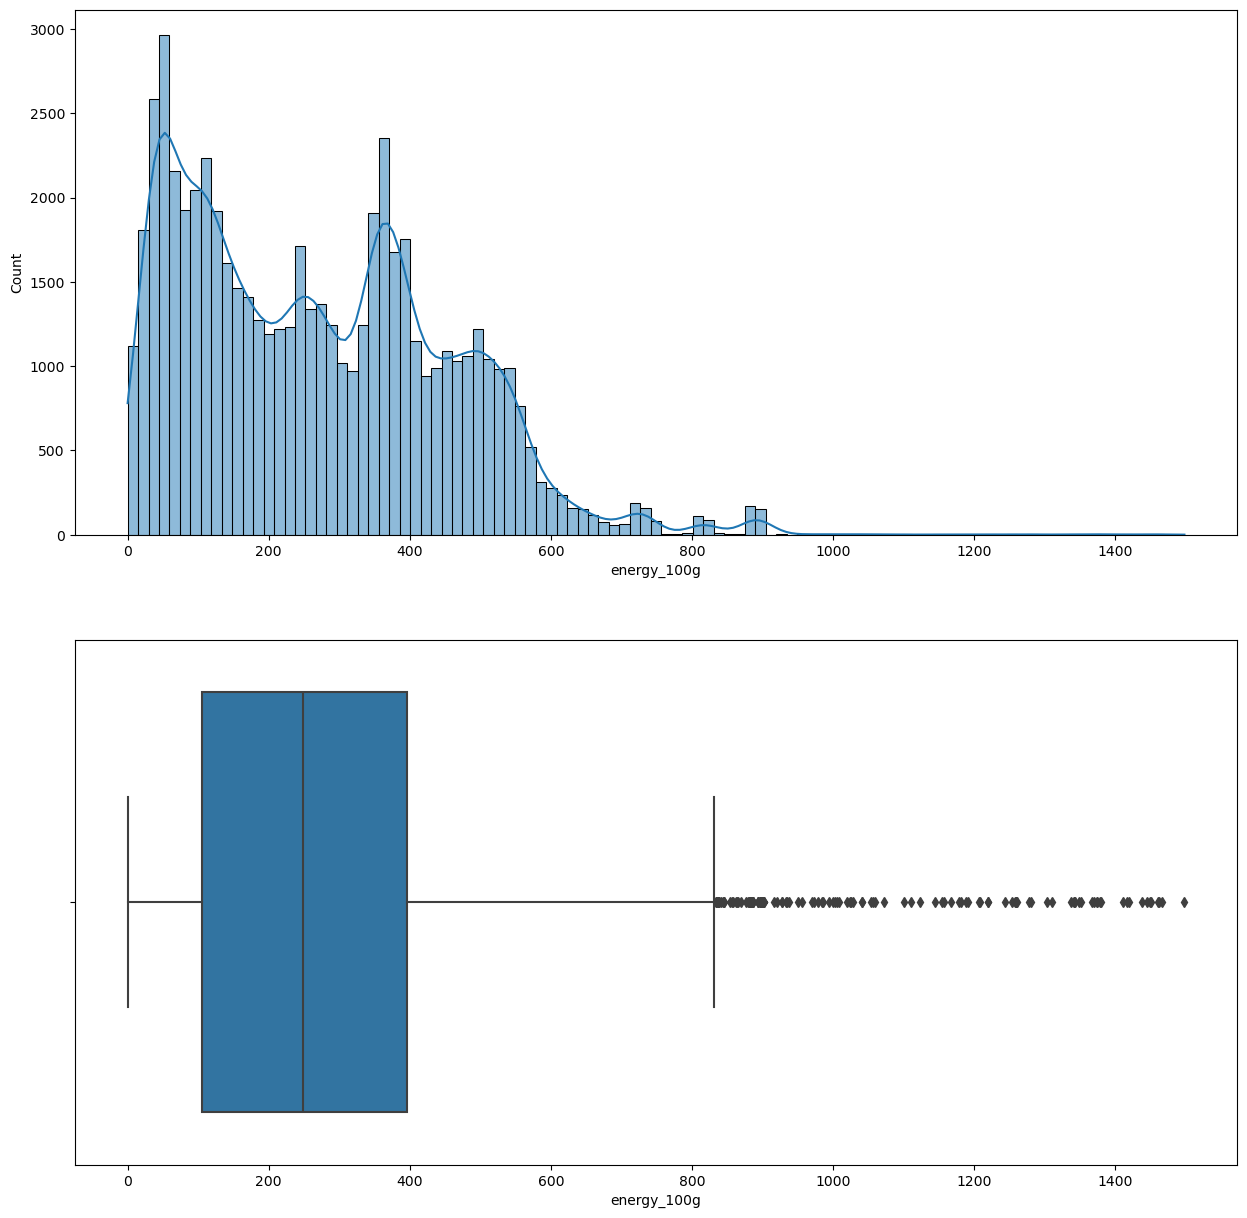

fat_100g
count    59044.000000
mean        12.520201
std         15.394929
min          0.000000
25%          1.900000
50%          8.400000
75%         18.000000
max        100.000000
Name: fat_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


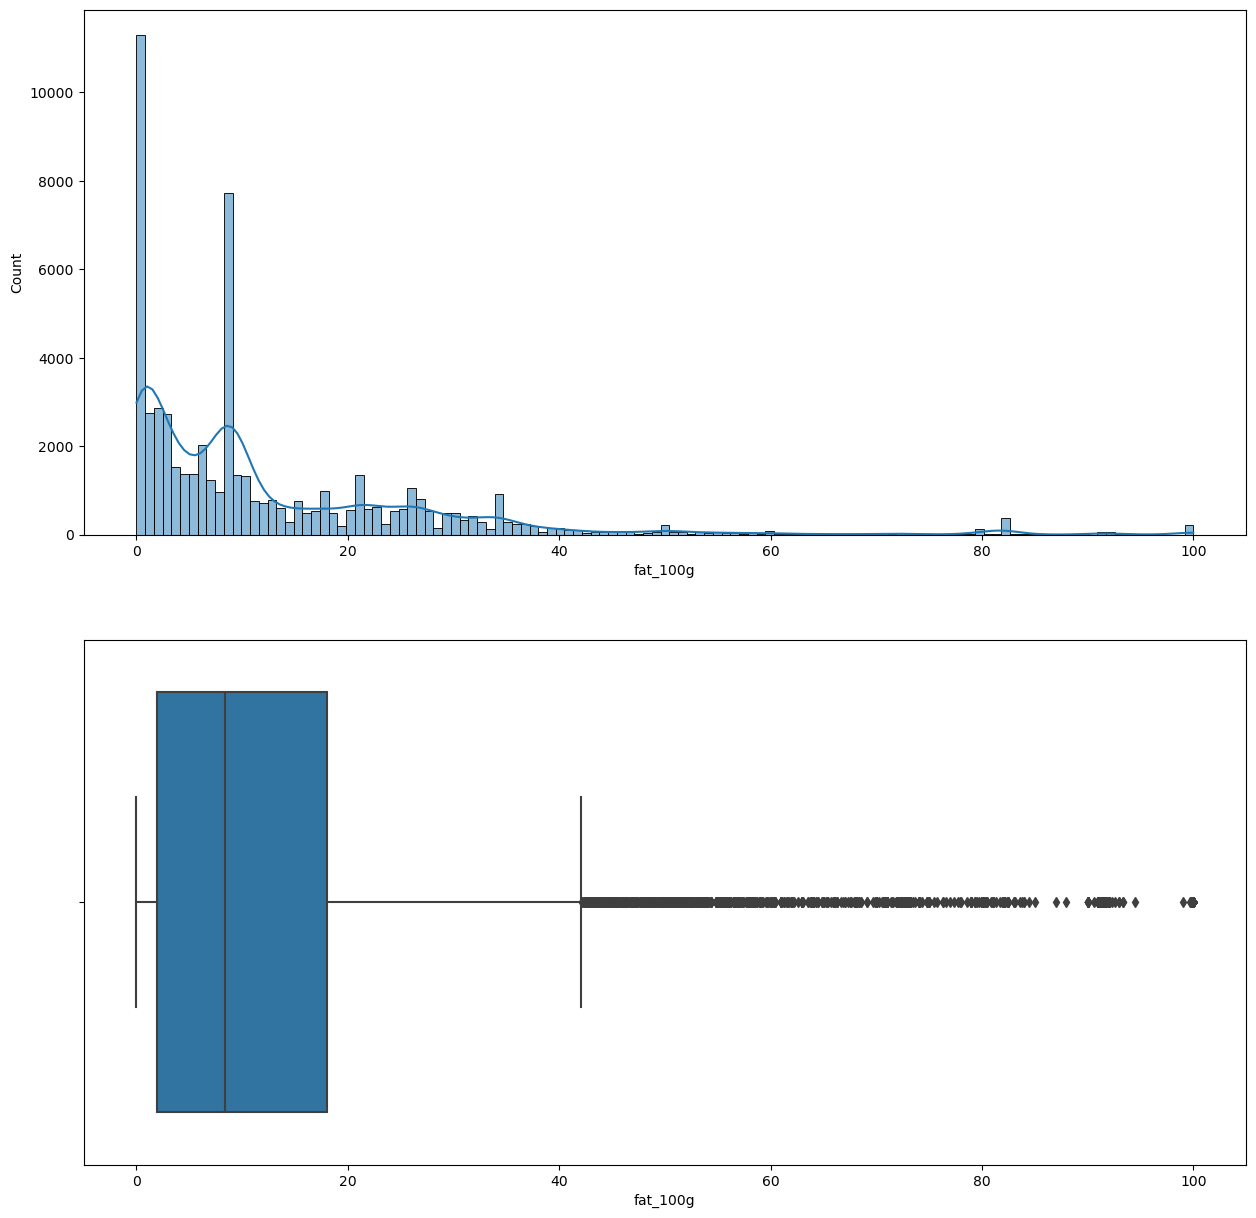

saturated-fat_100g
count    59044.000000
mean         4.456121
std          7.193849
min          0.000000
25%          0.300000
50%          1.700000
75%          5.500000
max        100.000000
Name: saturated-fat_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


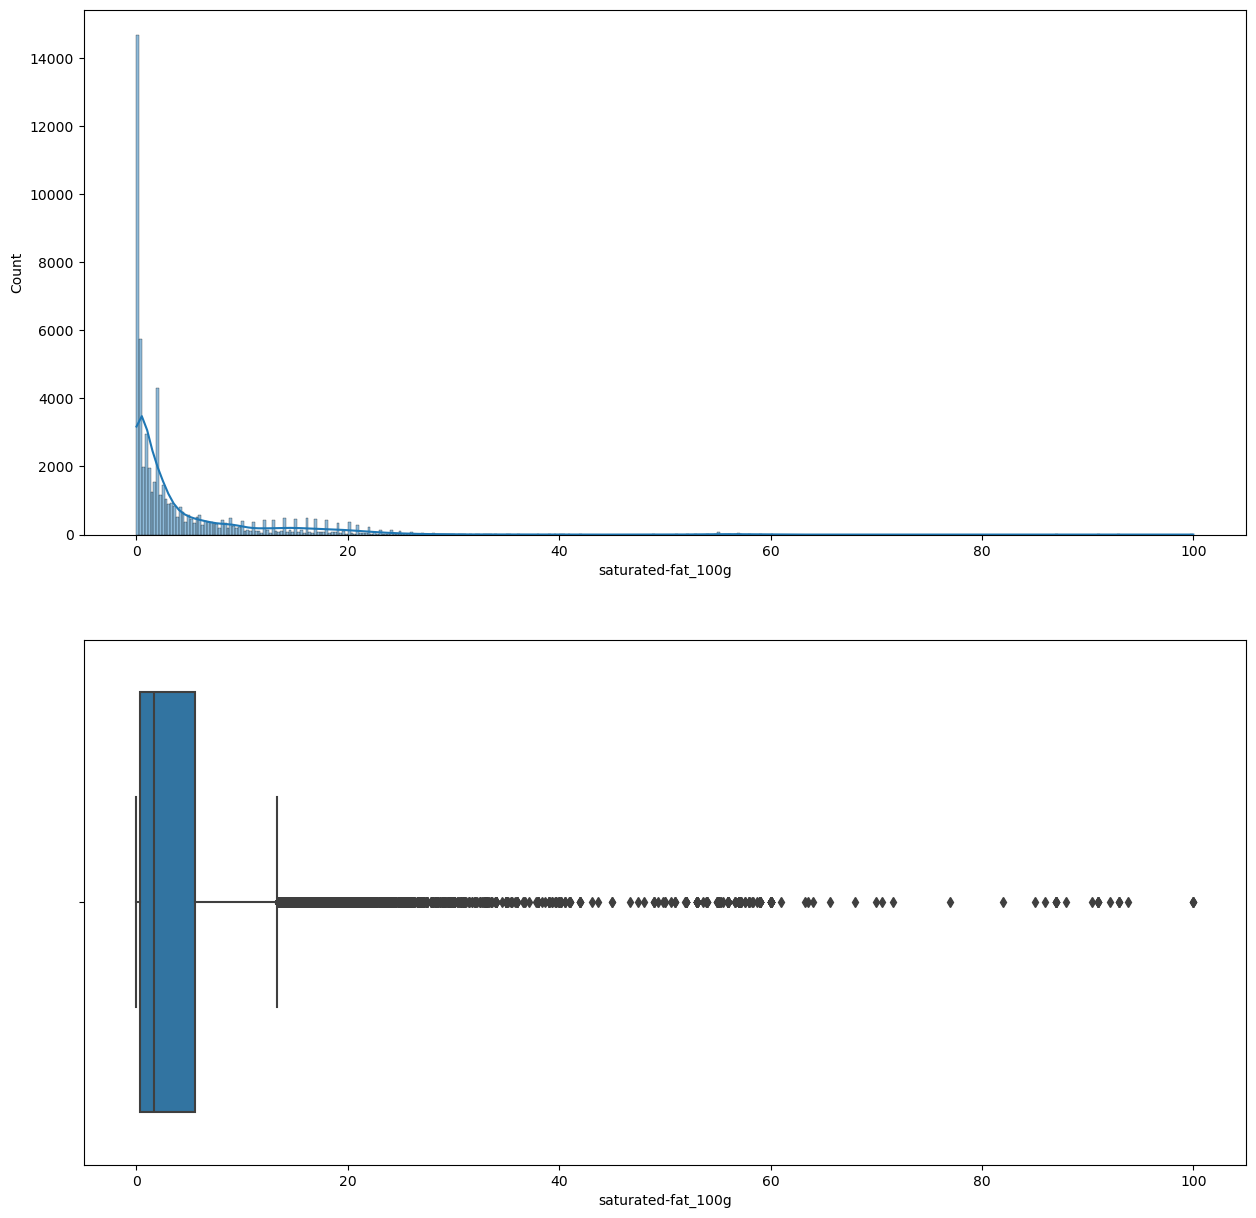

carbohydrates_100g
count    59044.000000
mean        27.713597
std         25.421154
min          0.000000
25%          5.100000
50%         20.550000
75%         51.000000
max        100.000000
Name: carbohydrates_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


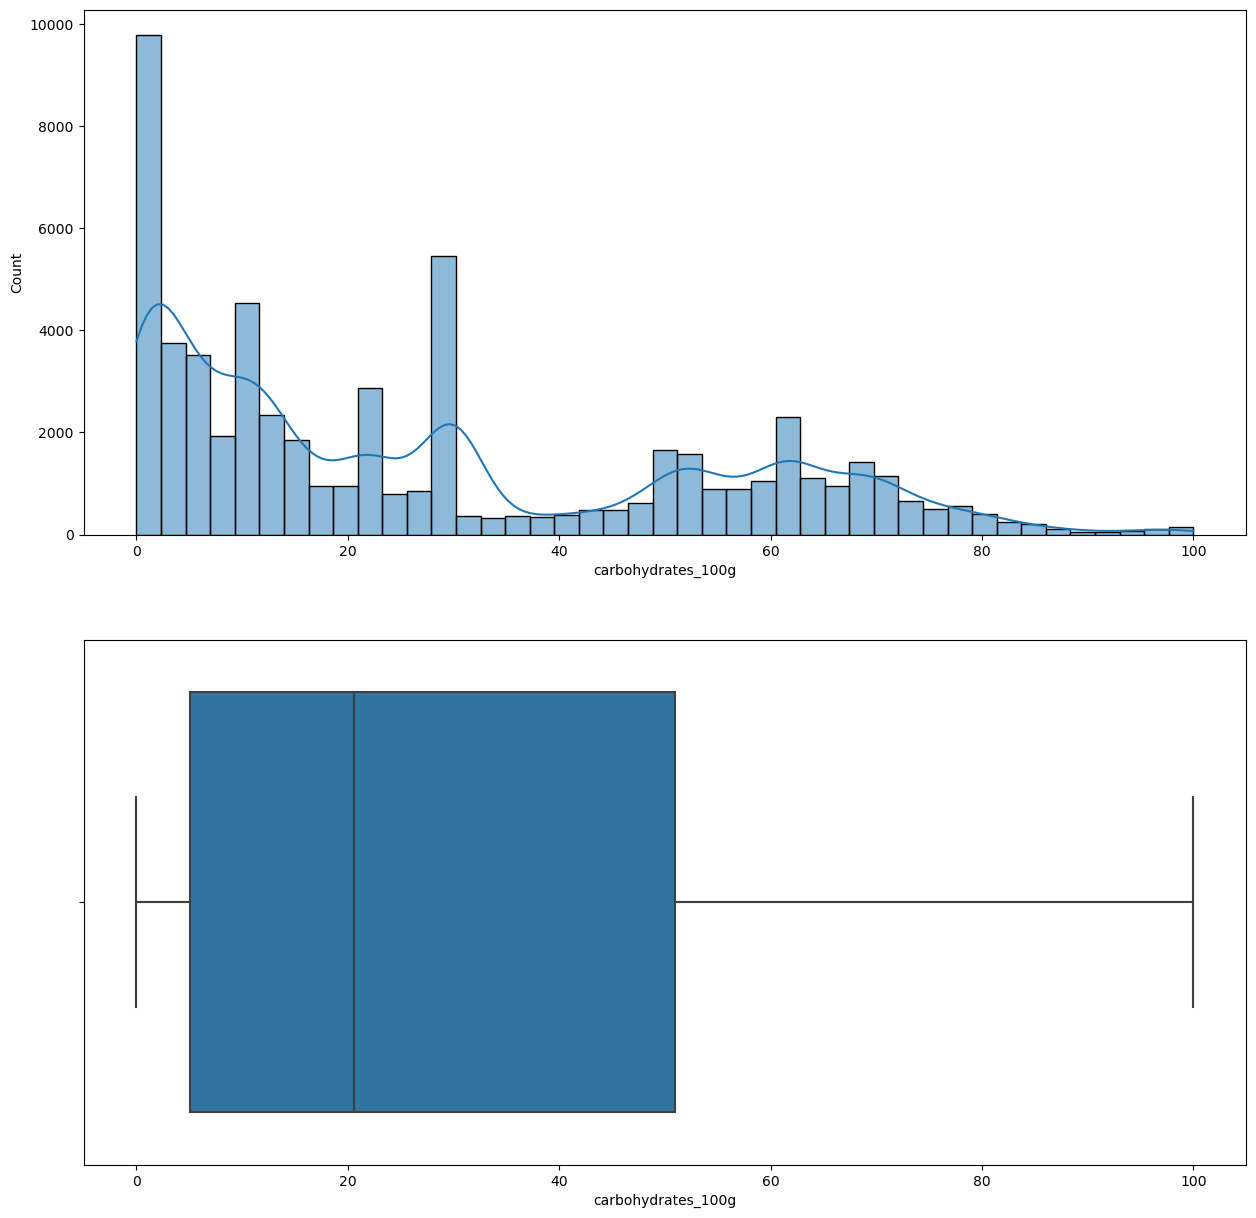

sugars_100g
count    59044.000000
mean        10.931613
std         16.550969
min          0.000000
25%          1.000000
50%          3.700000
75%         12.700000
max        100.000000
Name: sugars_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


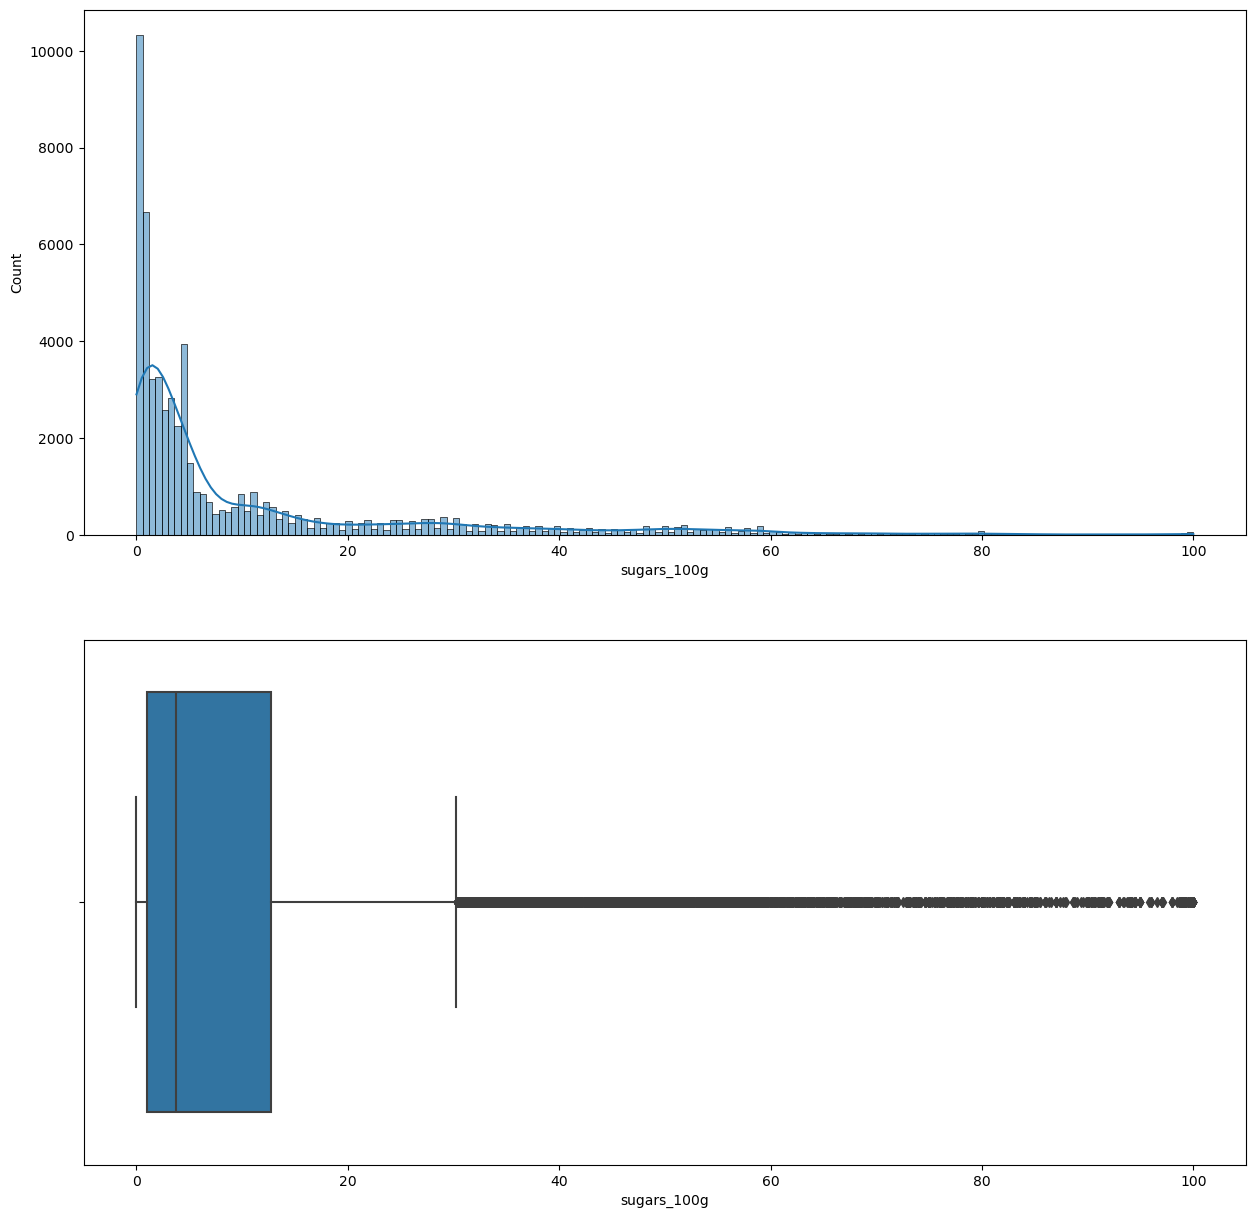

fiber_100g
count    59044.000000
mean         1.870262
std          4.076640
min          0.000000
25%          0.000000
50%          0.100000
75%          2.400000
max        100.000000
Name: fiber_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


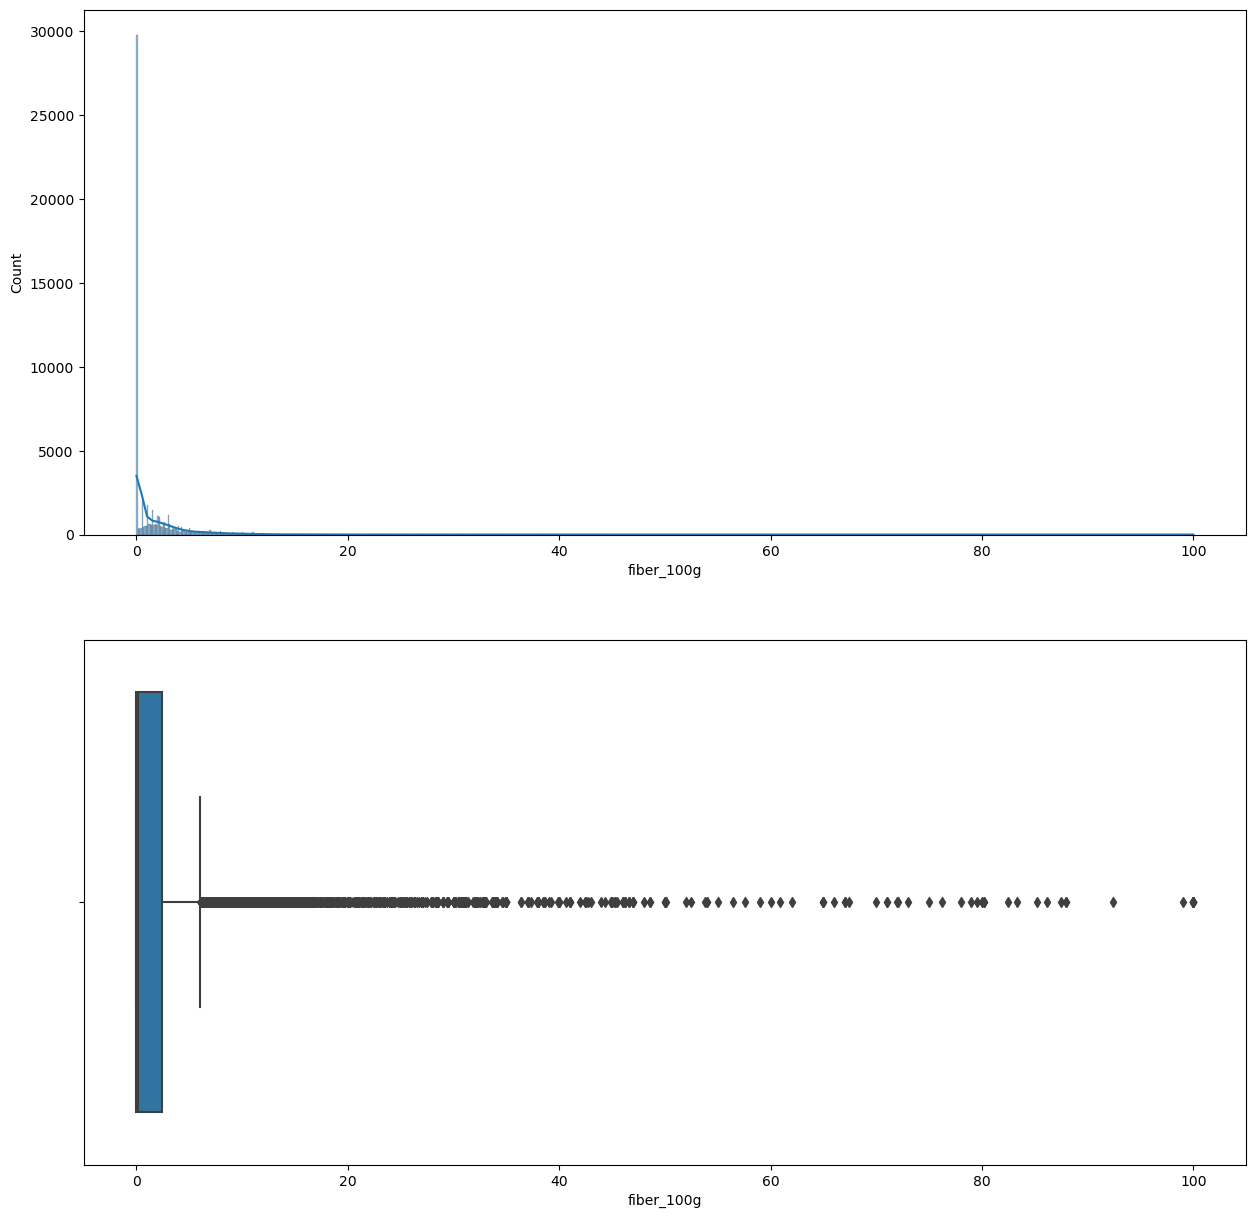

proteins_100g
count    59044.000000
mean         7.775740
std          7.857189
min          0.000000
25%          1.900000
50%          6.000000
75%         10.900000
max        100.000000
Name: proteins_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


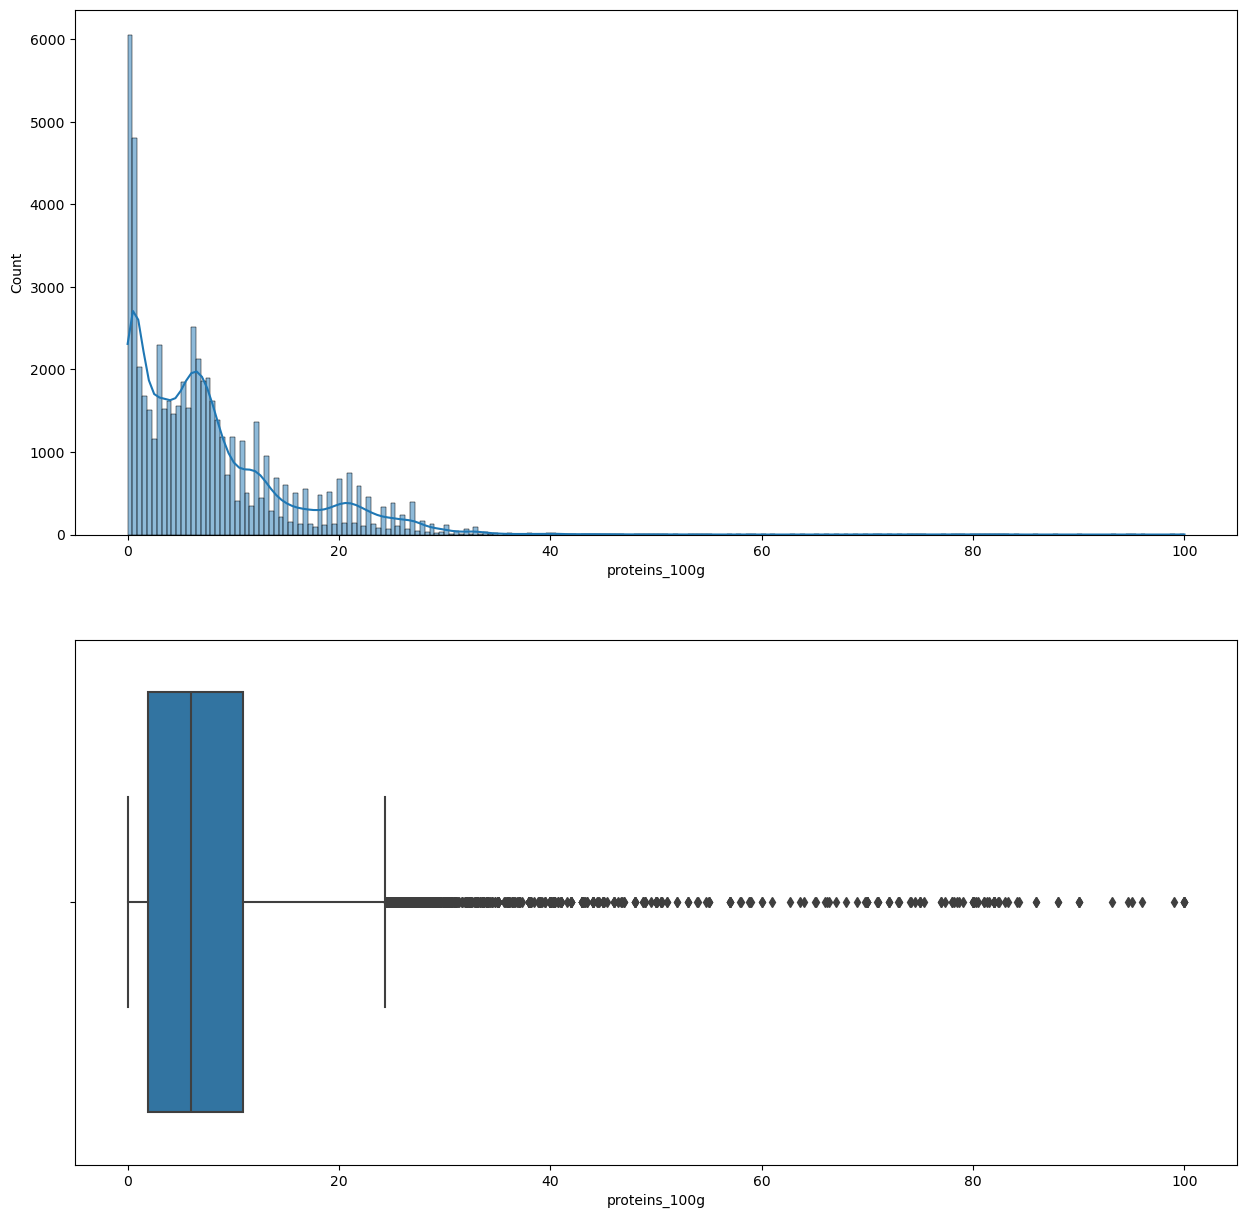

salt_100g
count    59044.000000
mean         1.077603
std          3.662882
min          0.000000
25%          0.080000
50%          0.558800
75%          1.230000
max        100.000000
Name: salt_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


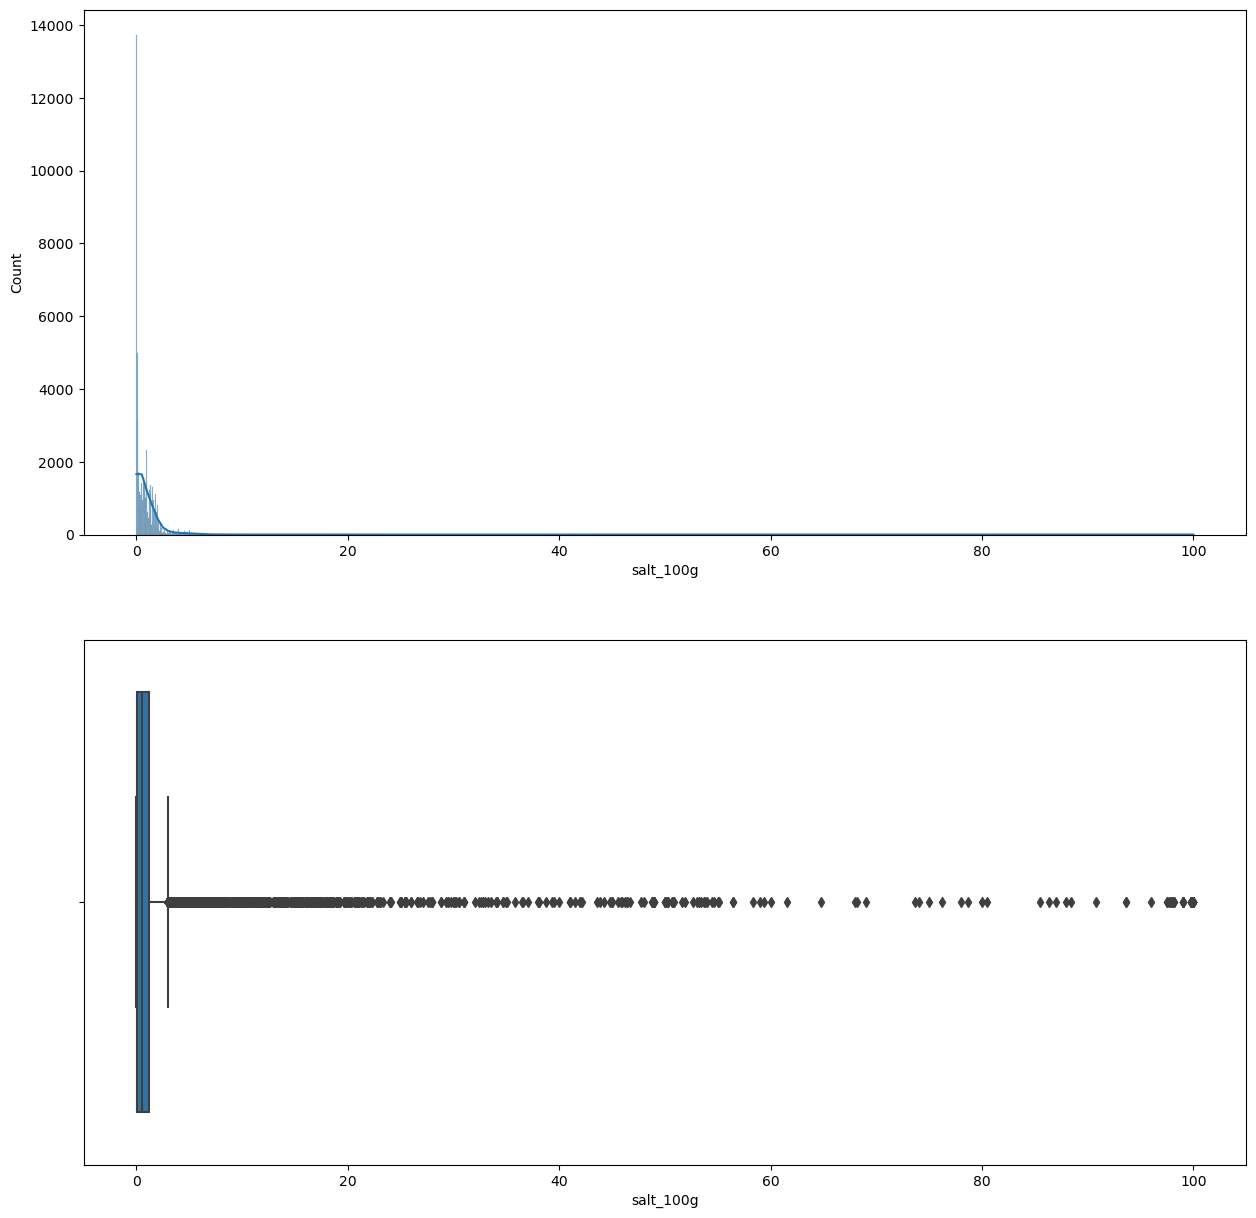

sodium_100g
count    59044.000000
mean         0.426486
std          1.495138
min          0.000000
25%          0.031496
50%          0.220000
75%          0.484252
max         83.000000
Name: sodium_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


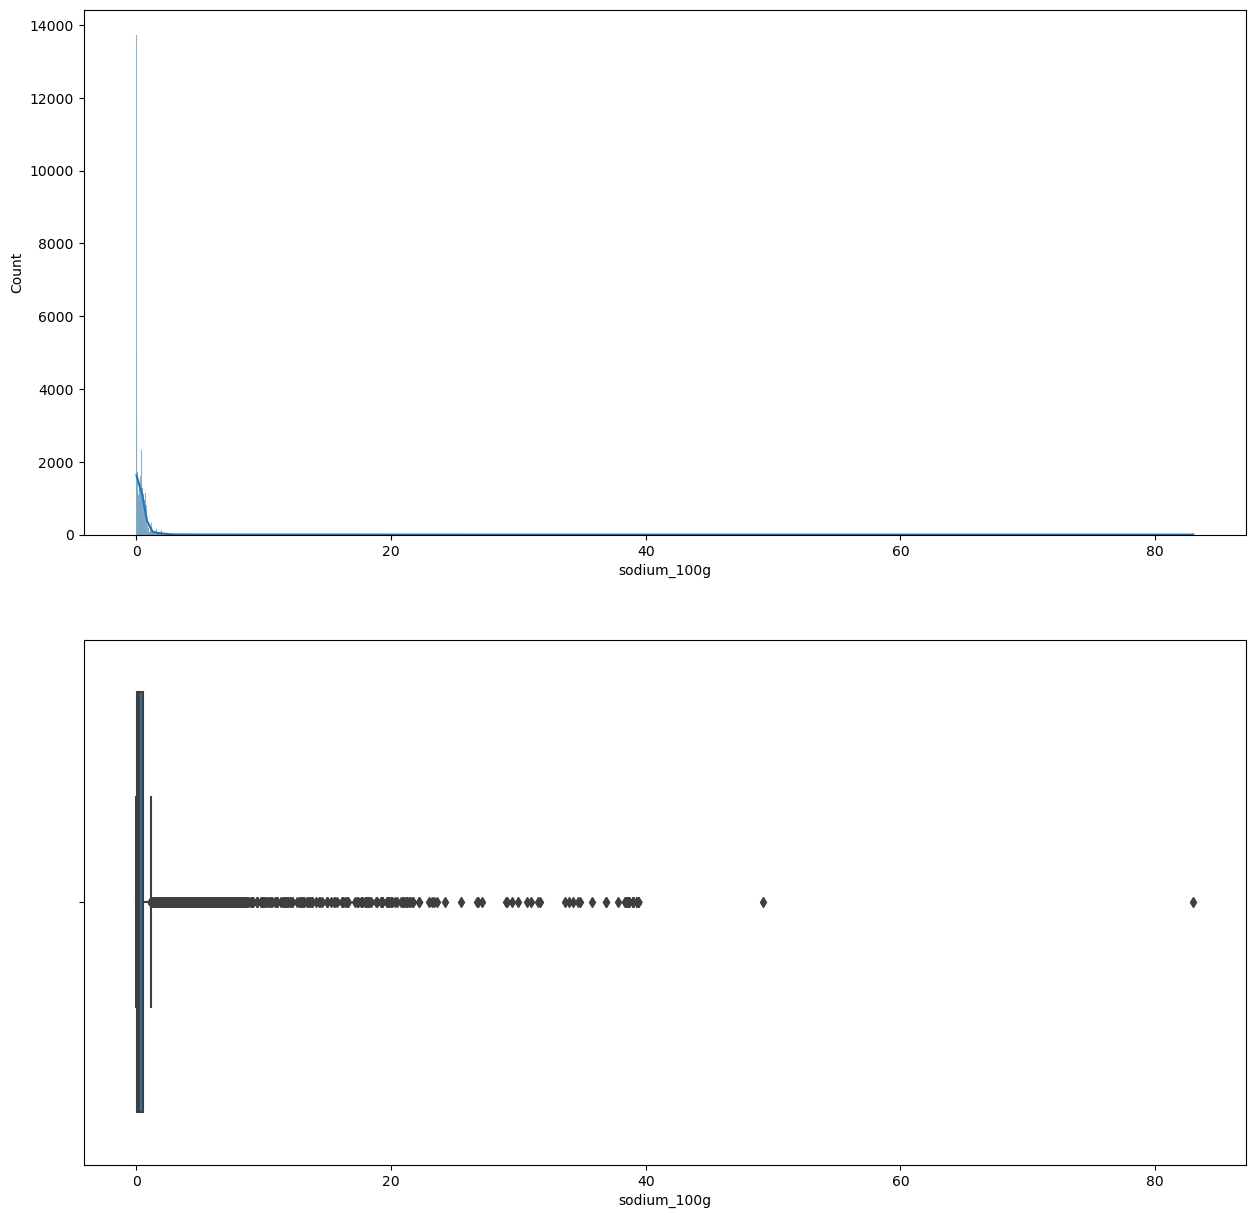

nutrition-score-fr_100g
count    59044.000000
mean         9.651463
std          8.220947
min         -7.500000
25%          2.000000
50%          9.000000
75%         15.000000
max         40.000000
Name: nutrition-score-fr_100g, dtype: float64


/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


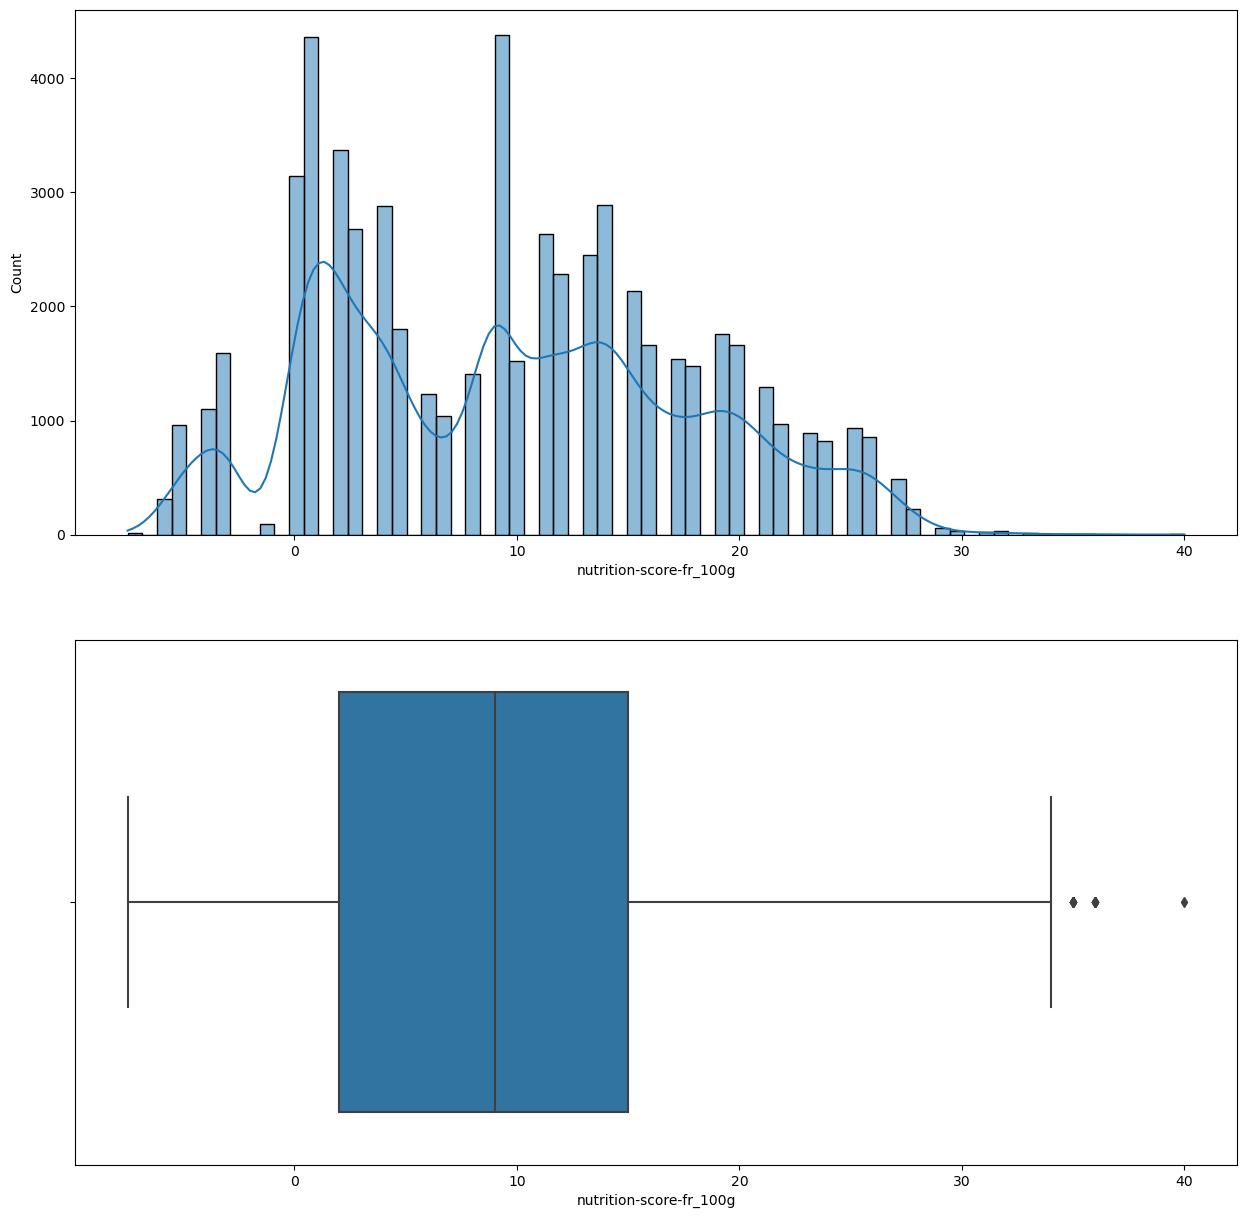

In [10]:
for var in vars_quant:
    univar_plot_quant(var)

## Bivariate Analysis

<Axes: title={'center': 'Correlation matrix'}>

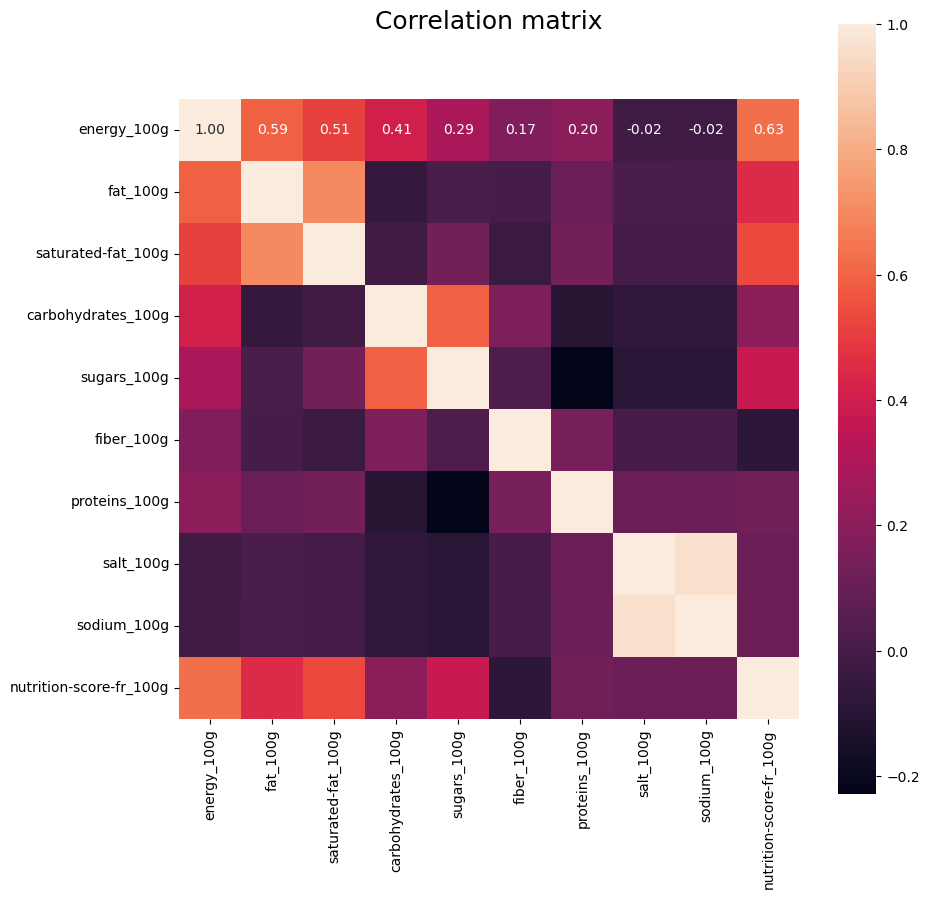

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Correlation matrix', fontdict={'fontsize':18}, x=0.5,y=1.1)
sns.heatmap(df[vars_quant].corr(), annot=True, fmt=".2f", square=True, ax=ax)

/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/omar-oc/anaconda3/envs/env_OC_P2/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/omar-oc/anaconda3/envs/env_

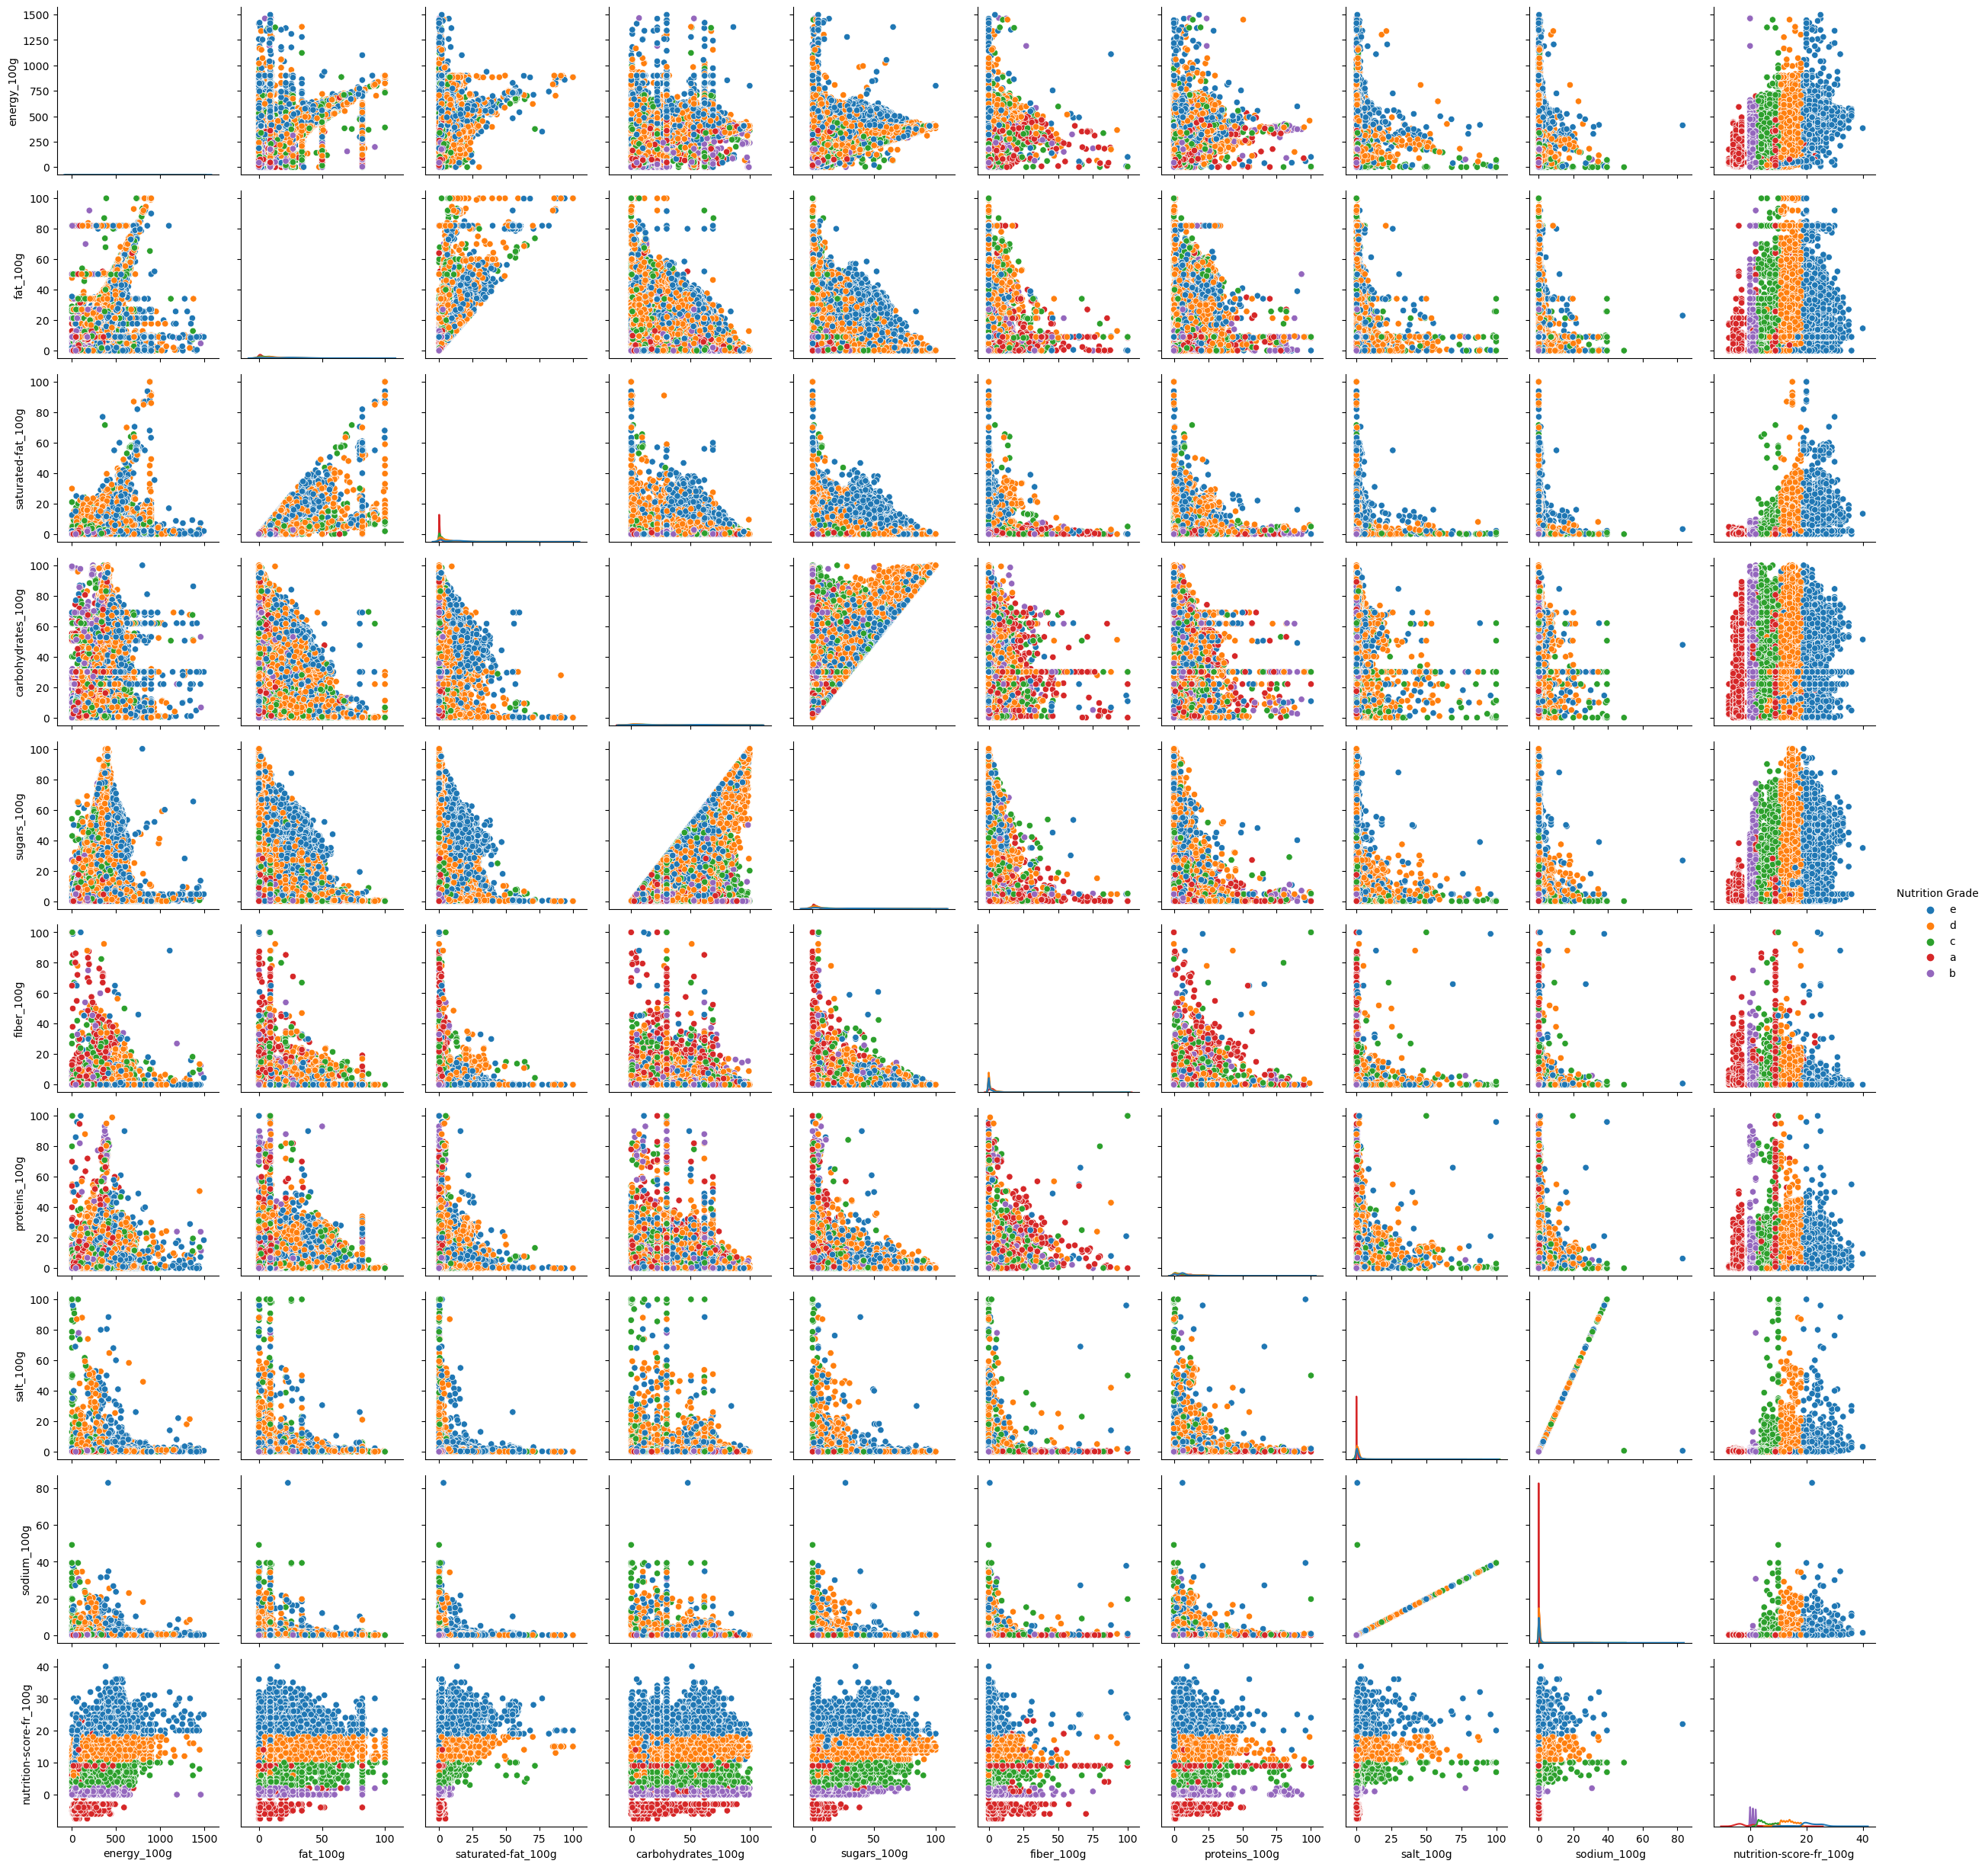

In [12]:
g = sns.PairGrid(df[vars_quant+["nutrition_grade_fr"]], hue="nutrition_grade_fr")
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="Nutrition Grade")
plt.show()

In [13]:
def nutri_pnns(pnns):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_title(pnns, fontdict={'fontsize':18}, x=0.5,y=1.1)
    sns.scatterplot(data=df[df["pnns_groups_2"]==pnns], x="nutrition-score-fr_100g", y="nutrition_grade_fr", hue="nutrition_grade_fr")
    plt.show()    

In [14]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [15]:
def anova(x,y):
    modalites = df[x].unique()
    groups = []
    for m in modalites:
        groups.append(df[df[x]==m][y])

    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
        
    plt.boxplot(groups, labels=modalites, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.title(y)
    plt.show()

    print(f'eta_squared: {eta_squared(df[x], df[y]):.2f}')

    f_statistic, p_value = stats.f_oneway(*groups)
    print(f'P-value: {p_value:.2f}')

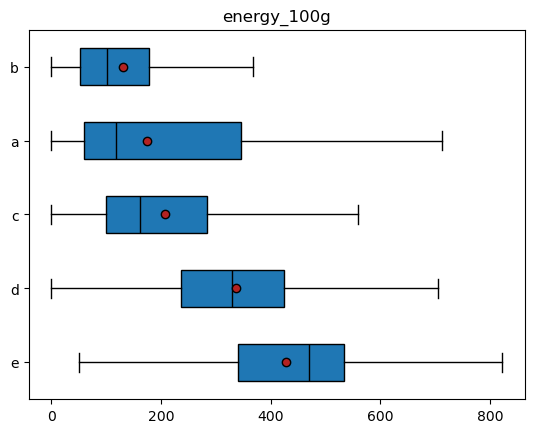

eta_squared: 0.32
P-value: 0.00


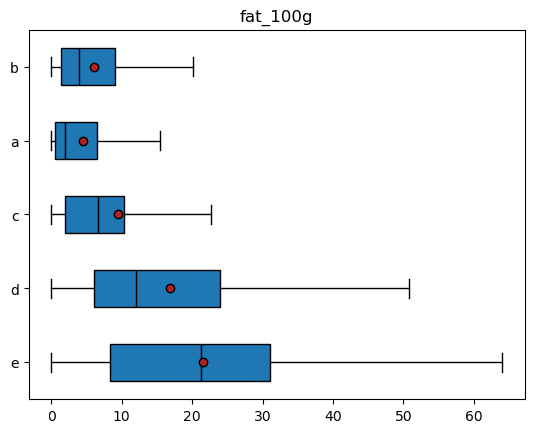

eta_squared: 0.17
P-value: 0.00


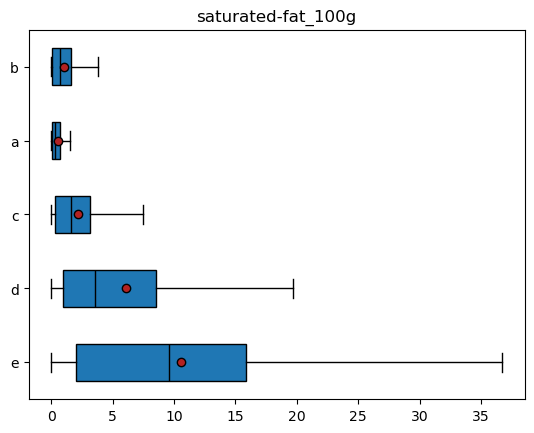

eta_squared: 0.26
P-value: 0.00


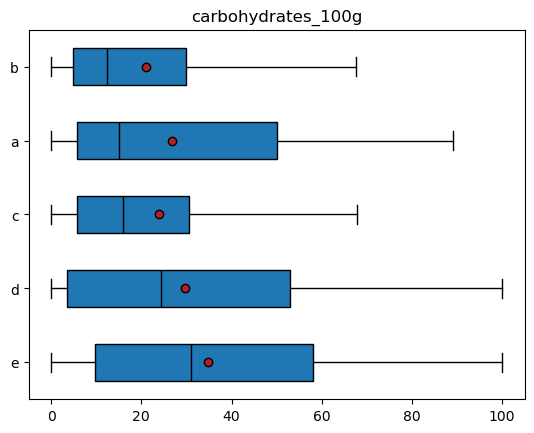

eta_squared: 0.03
P-value: 0.00


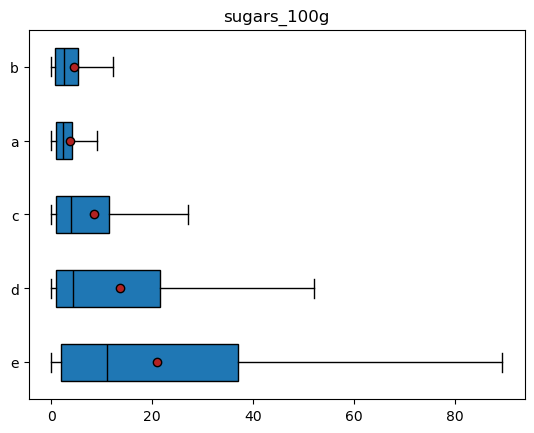

eta_squared: 0.14
P-value: 0.00


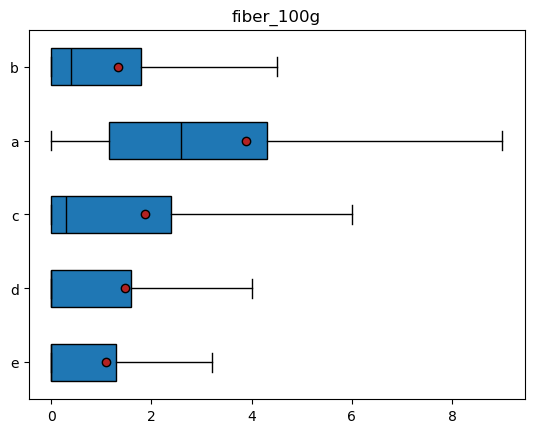

eta_squared: 0.05
P-value: 0.00


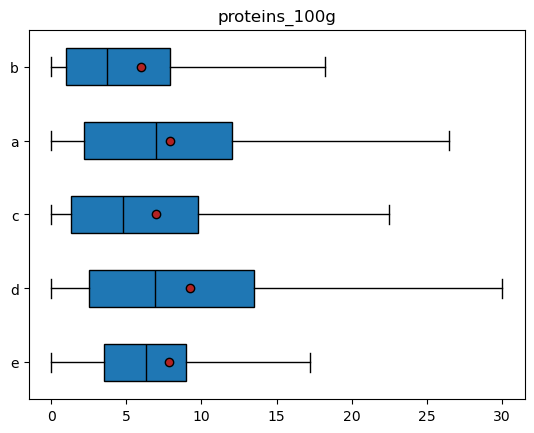

eta_squared: 0.02
P-value: 0.00


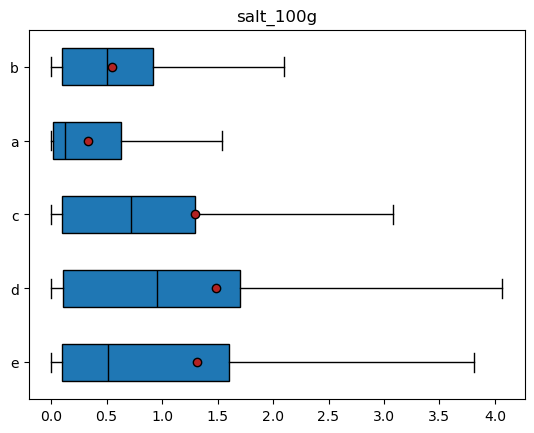

eta_squared: 0.01
P-value: 0.00


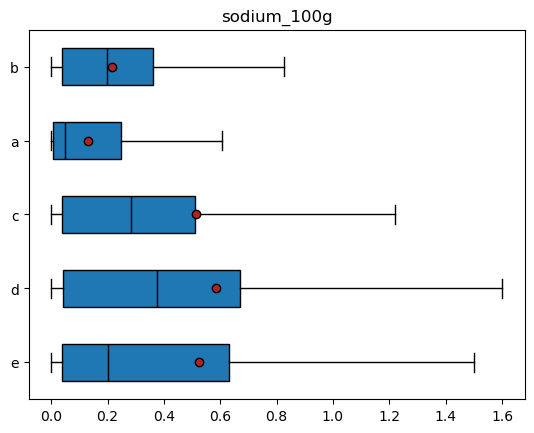

eta_squared: 0.01
P-value: 0.00


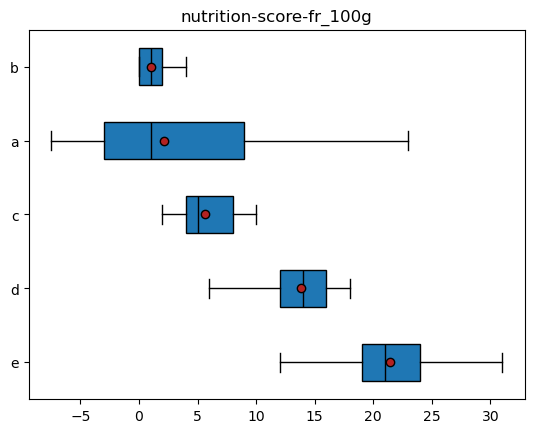

eta_squared: 0.82
P-value: 0.00


In [16]:
for y in vars_quant:
    anova("nutrition_grade_fr", y)

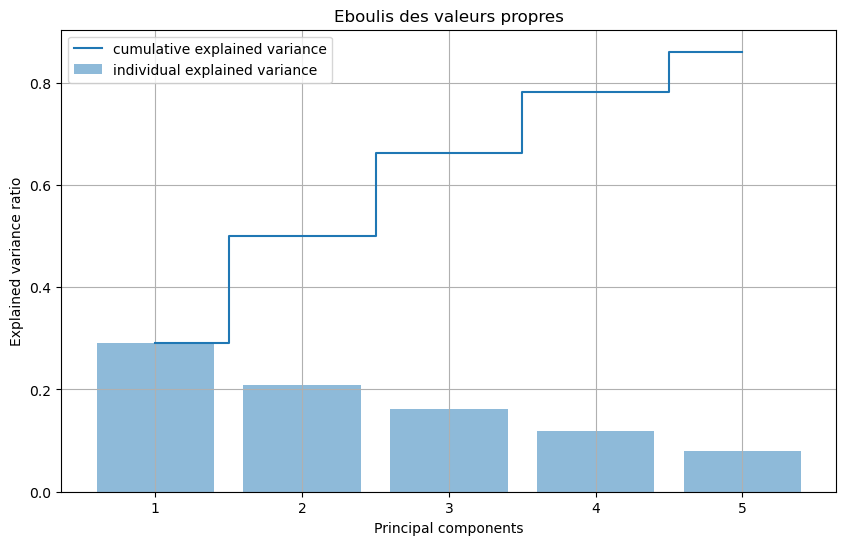

Component 1: 29.18% of explained variance
Component 2: 20.83% of explained variance
Component 3: 16.19% of explained variance
Component 4: 11.93% of explained variance
Component 5: 7.92% of explained variance


In [17]:
X = df[vars_quant].values

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(0.8)
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Eboulis des valeurs propres')
plt.legend(loc='best')
plt.grid()
plt.show()

for i, ev in enumerate(explained_variance, 1):
    print(f'Component {i}: {ev*100:.2f}% of explained variance')

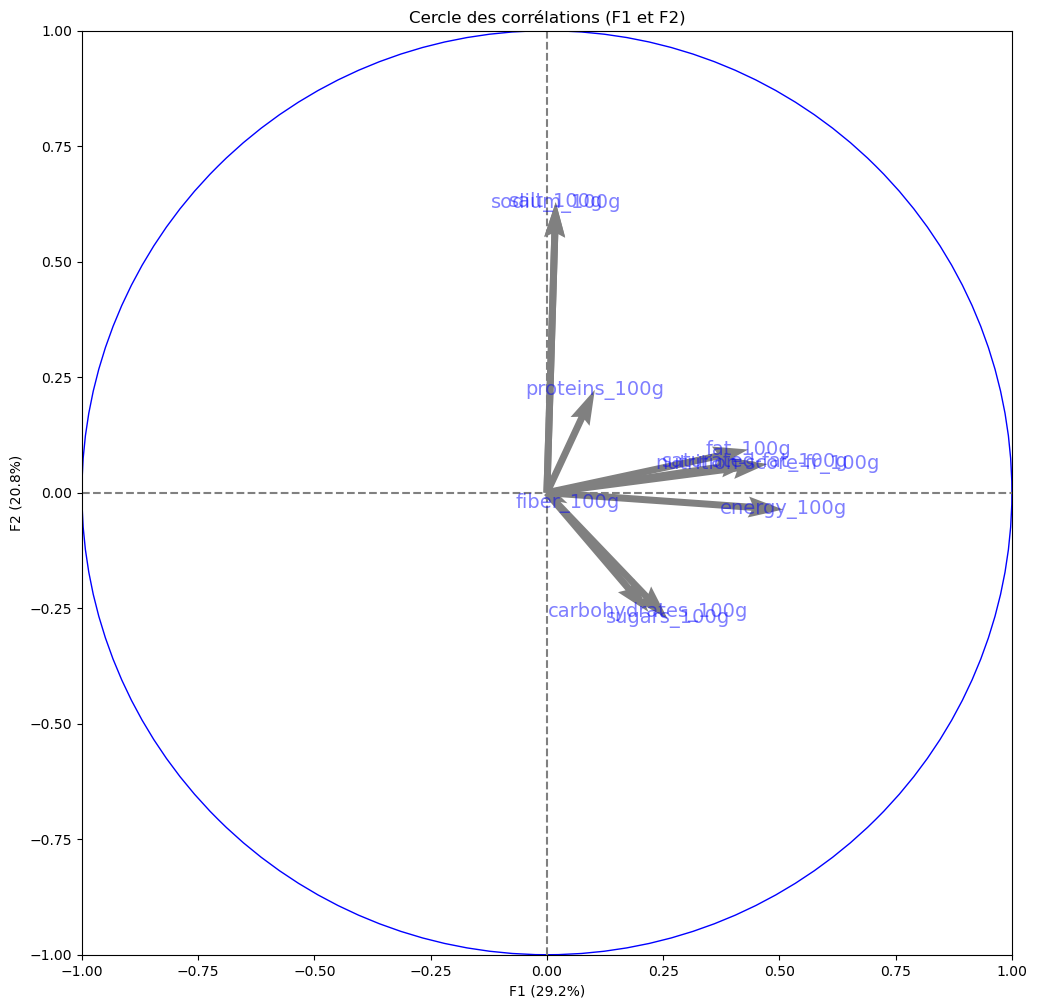

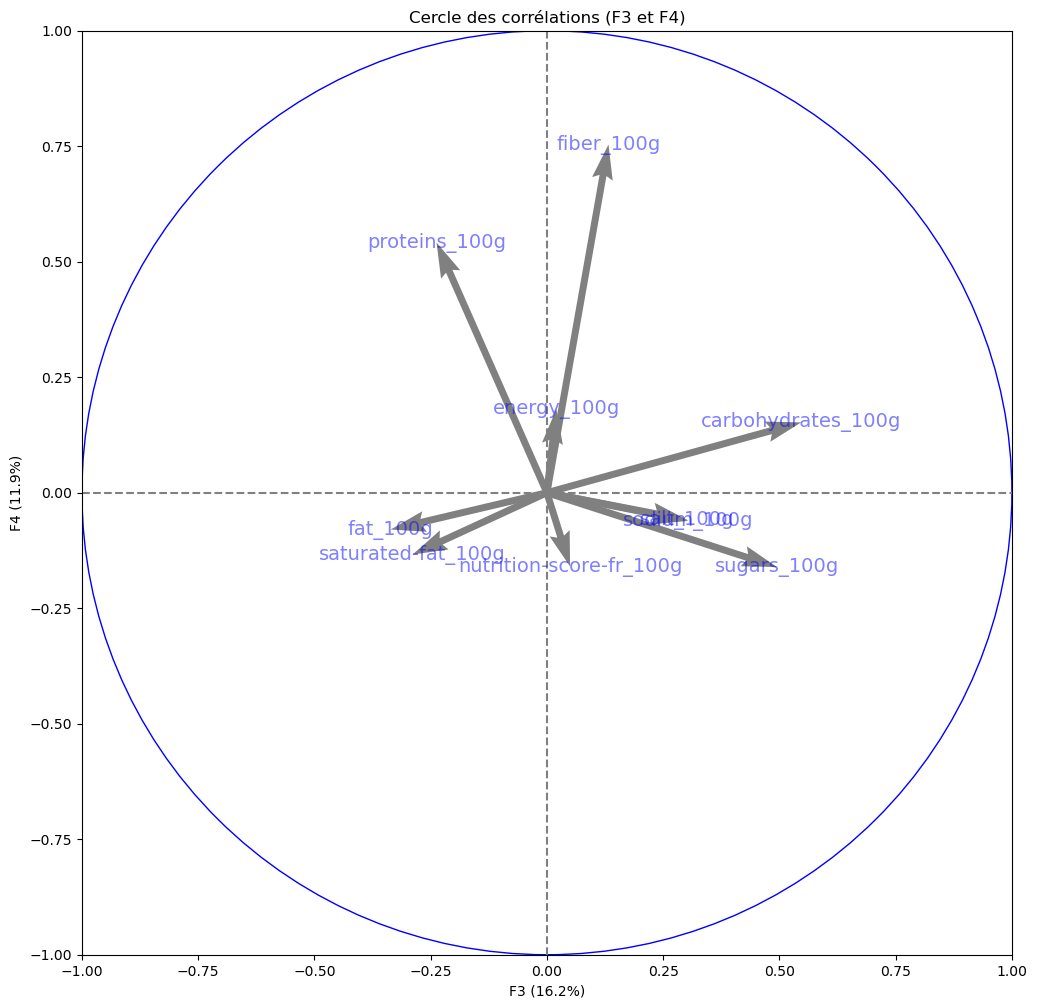

In [18]:
# Cercle des corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les plans factoriels spécifiés, ici [(0,1), (2,3), (4,5)]
        if d2 < n_comp:

            # Initialisation de la figure
            fig, ax = plt.subplots(figsize=(12,12))

            # Détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Affichage des flèches
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

# Composantes principales
pcs = pca.components_
n_comp = pcs.shape[0]

# Définir les paires de composantes à visualiser, en s'assurant qu'elles sont dans les limites
axis_ranks = [(0,1), (2,3), (4,5)]
axis_ranks = [(d1, d2) for d1, d2 in axis_ranks if d2 < n_comp]

# Afficher les cercles des corrélations
display_circles(pcs, n_comp, pca, axis_ranks, labels=np.array(vars_quant))

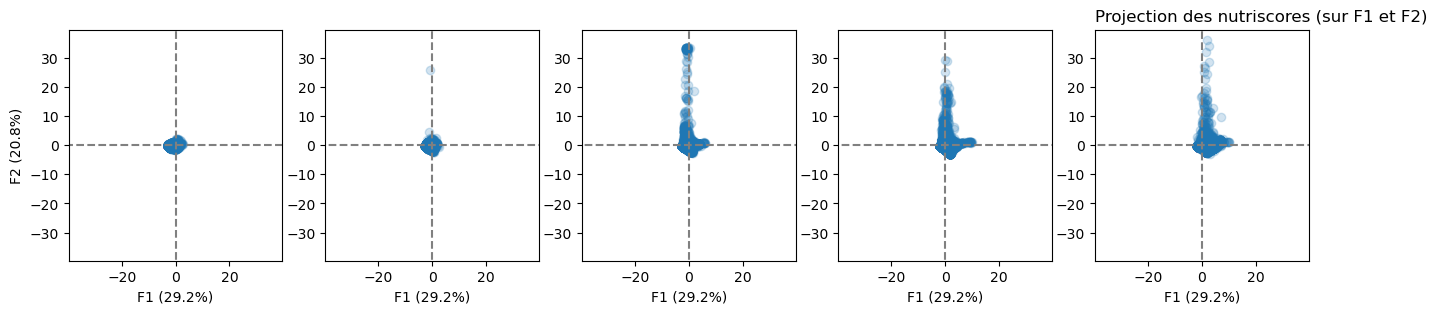

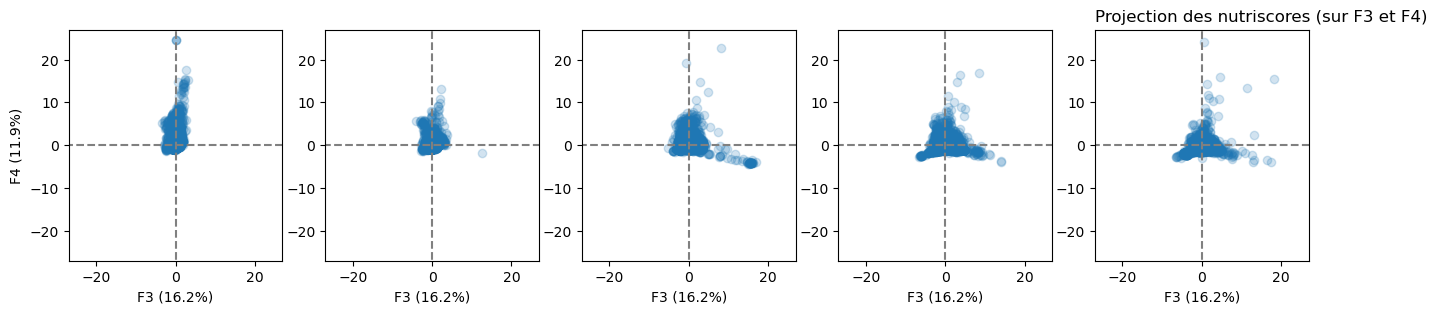

IndexError: index 5 is out of bounds for axis 1 with size 5

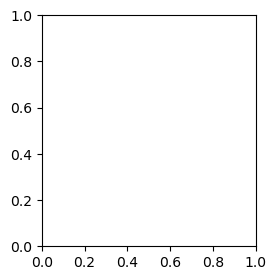

In [19]:
# Projection des individus
X_projected = pca.transform(X_scaled)
nutriscores = df['nutrition_grade_fr']
for d1, d2 in [(0,1),(2,3),(4,5)]:
    if d2 < 6:

        # initialisation de la figure       
        fig = plt.figure(figsize=(16, 3))

        # affichage des points
        pos = 1
        for value in np.unique(nutriscores):
            selected = np.where(nutriscores == value)
            plt.subplot(1, 5, pos)
            plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=0.2, label=value)

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            if pos == 1:
                plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            pos += 1

        plt.title("Projection des nutriscores (sur F{} et F{})".format(d1+1, d2+1), loc='left')          
        plt.show(block=False)